# COMP3340 Group Project

# Introduction

Make sure you have followed the HKU CS GPU Farm setup guide in <a href="https://github.com/WuKunhuan/HKU_COMP3340/tree/main/HKU%20CS%20GPU%20Farm" target="_blank">HKU CS GPU Farm</a>. You should be able to view the JupyterLab of the virtual environment in a browser locally. Download this notebook from GitHub, and upload it to the virtual environment. After that, run the following setup module. 

------
# 1. Setup
<span style="color:red; font-weight:bold">Run the below module. </span>

In [ ]:
import codes.setup as setup
import codes.Oxford_17_Dataset as Oxford
import codes.DIY_Dataset as DIY
import codes.setup_default_dataset as setup_dataset
import codes.import_dataset as import_dataset
import codes.model as model
import codes.experiment as experiment
import codes.Download_Dataset as Download

GP_setup = setup.setup()
setup_dataset.setup_default_dataset(GP_setup)

------
# 2. Dataset

## 2.1 Setup Dataset (optional)

### Create Oxford 17 dataset
* __Usage__: Setup an original Oxford 17 dataset (supports further modifications such as adding augmented images). Parameters: 

Oxford.Oxford_17_Dataset (GP_setup, ```dataset_name```, ```train```, ```val```, ```test```, ```dataset_ratio```)

```train```, ```val```, ```test``` is the ratio of dividing the dataset images into train. val and test datasets. 

```dataset_ratio``` is the proportion of the original Oxford_17 dataset to be used. Its values (0, 1]. 

In [ ]:
Oxford.Oxford_17_Dataset (GP_setup, "Oxford_17", 8, 1, 1, 1)

### Create your own dataset
* __Usage__: After running this module, put your images for each class into the train, val and test datasets. Parameters: 

DIY.DIY_Dataset (GP_setup, ```dataset_name```)

In [ ]:
DIY.DIY_Dataset (GP_setup, "My_dataset")

### Download dataset (.zip) from a web link
* __Usage__: Put the ```public link``` of the zipped dataset (including 3 sub-folders: train, val, test; each sub folder has 17 classes named from class_1 to class_17) as a parameter to the below module. Set the ```name``` of the unzipped dataset. 

You may upload your zipped dataset to the following link: https://filebin.net/. Get the link by the following operation: 

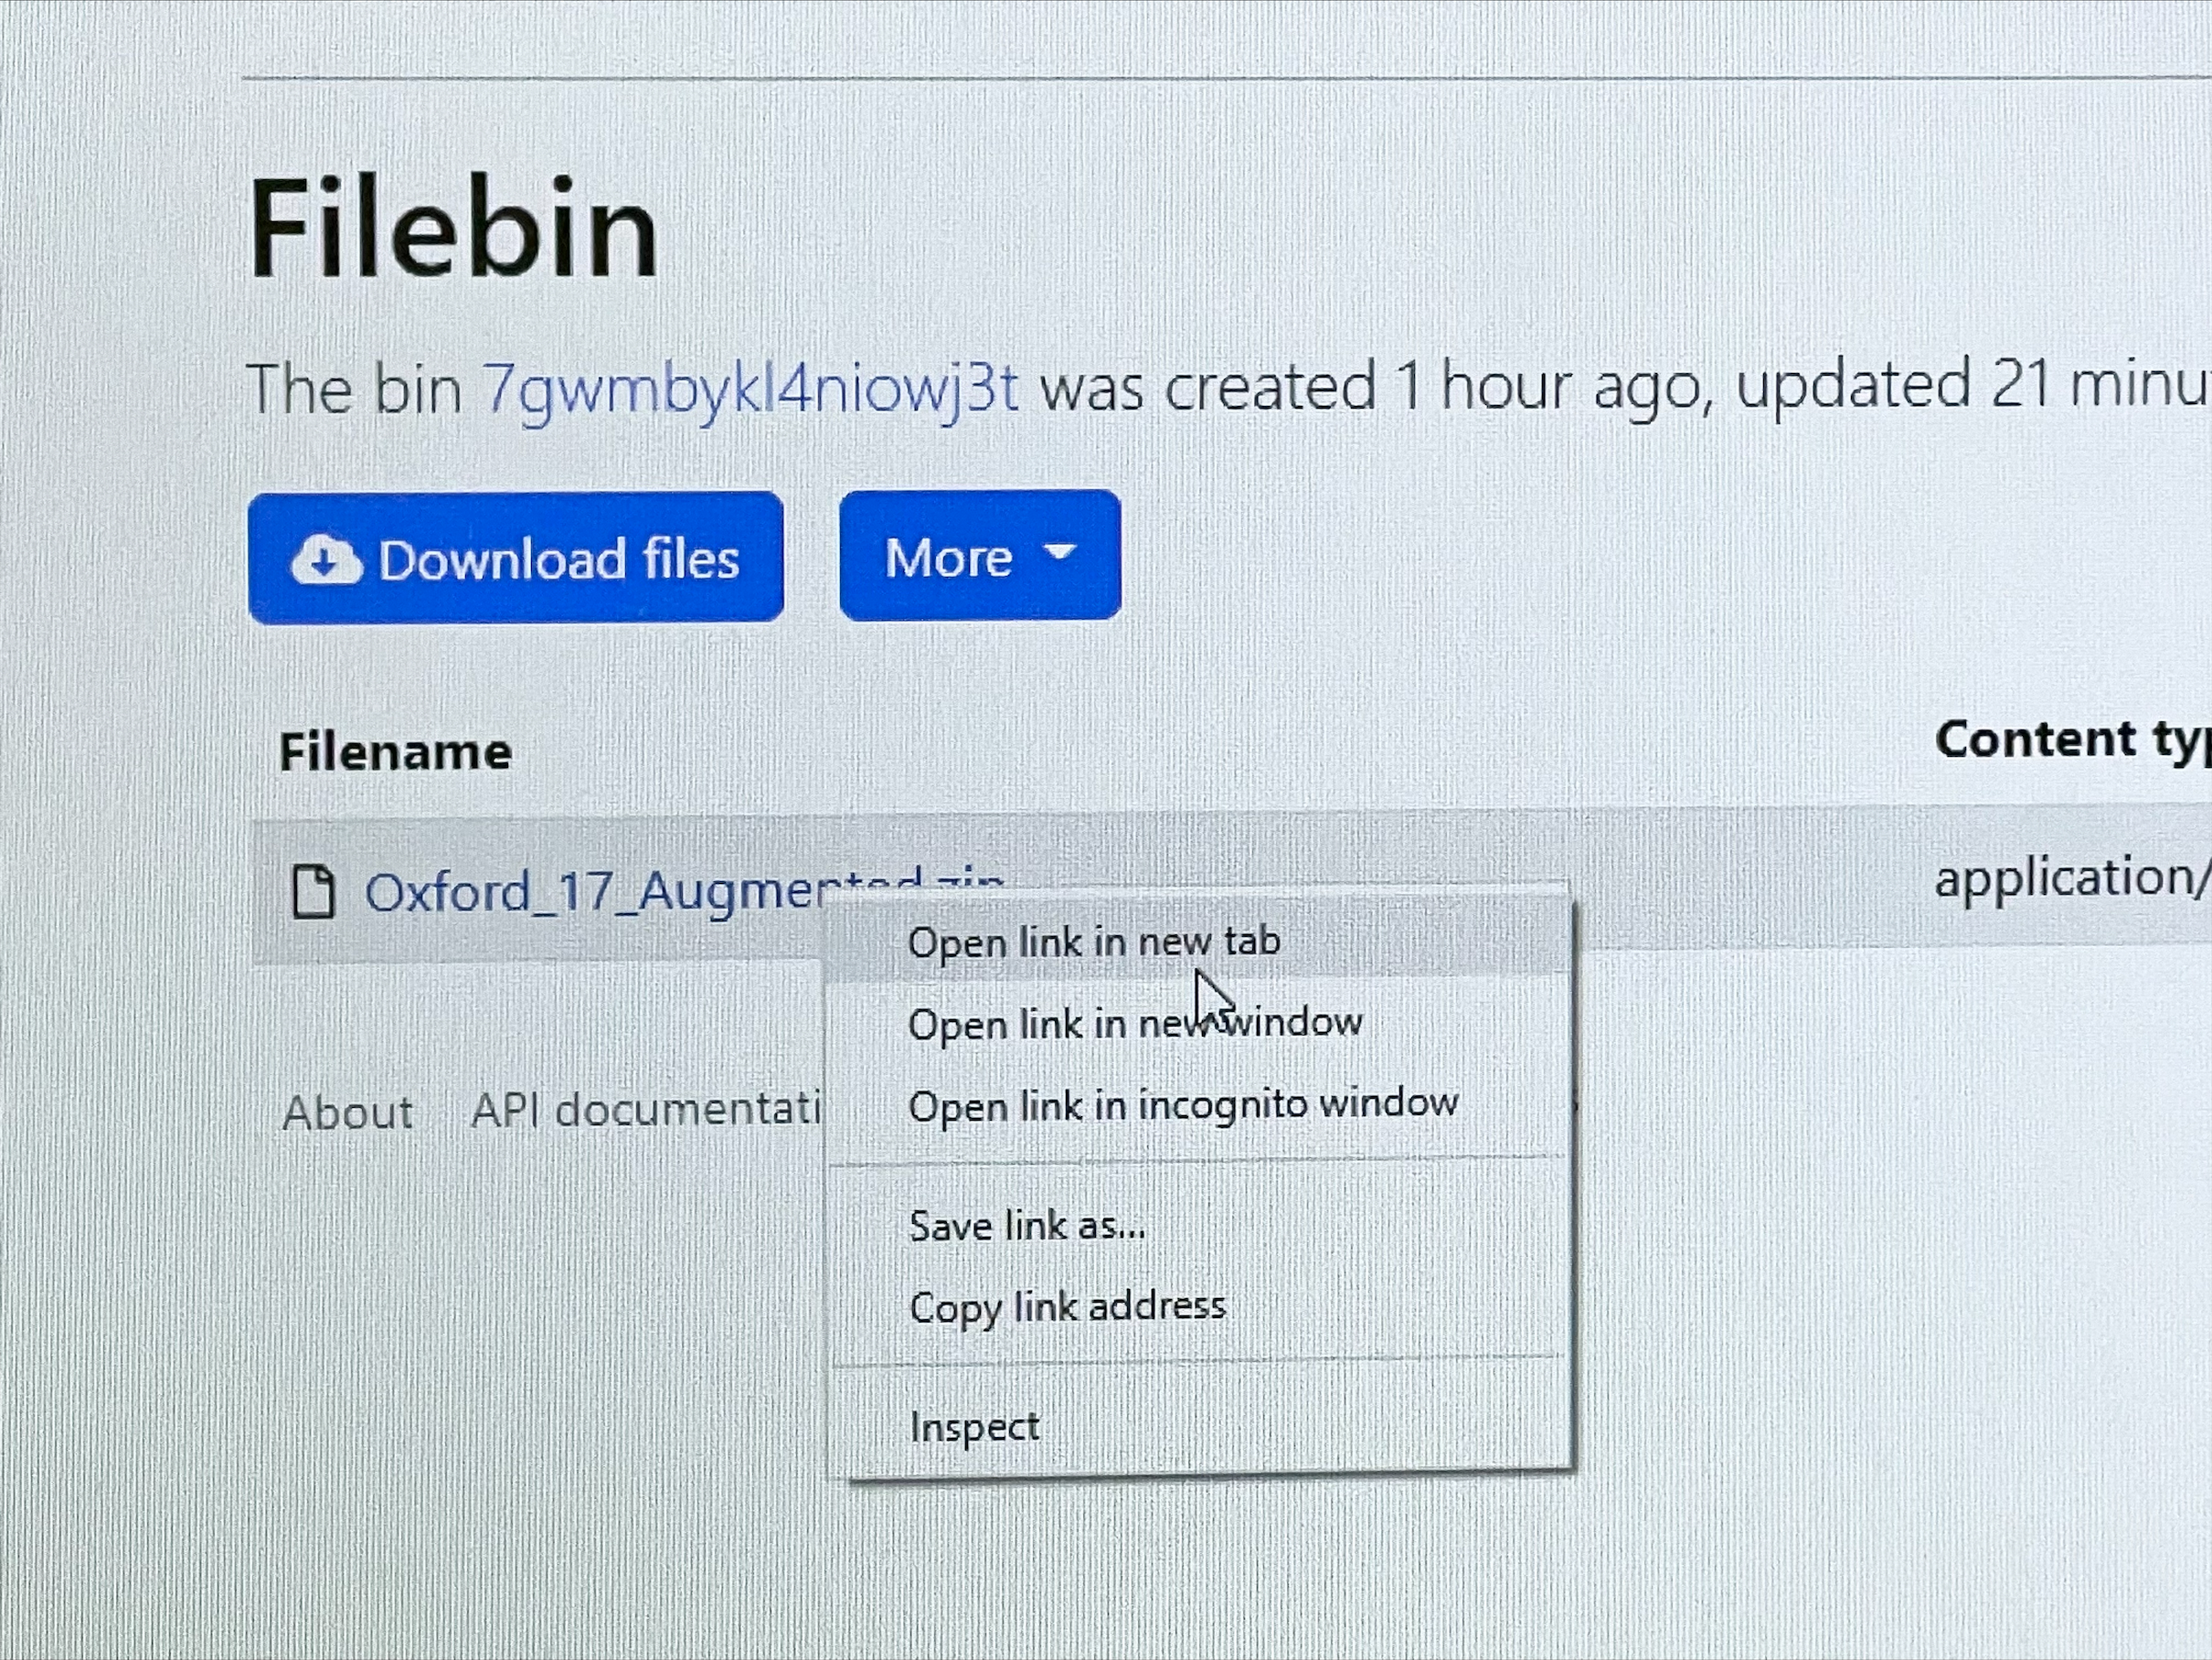

Parameters: 

Download.Download_Dataset (GP_setup, ```dataset_link```, ```dataset_name```)

In [ ]:
Download.Download_Dataset (GP_setup, "https://filebin.net/7gwmbykl4niowj3t/Oxford_17_Augmented.zip" , "Oxford_17_Augmented")

## 2.2 Import dataset
<span style="color:red; font-weight:bold">Run the below module. </span>
* __Usage__: Run this module to import the dataset for training, validation and testing. Parameters: 

dataset = import_dataset.import_dataset (GP_setup, ```dataset_name```)

In [ ]:
dataset = import_dataset.import_dataset (GP_setup, "Oxford_17")

------
# 3. Train models

## 3.1 Remove all trained models (optional)

In [ ]:
model.model_schema().remove_all_trained_models(GP_setup)

## 3.2 Train and save one model (optional)
* __Basic models__

```AlexNet```

```VGG``` (VGG_11, VGG_13, VGG_16, VGG_19)

```ResNet``` (ResNet_18, ResNet_34, ResNet_50)

```Inception``` (Inception_V1, Inception_V4)

* __Preparation__: Select one basic model OR define your own image classification models and put it inside the ```models``` folder to train.

Your model.py should contain the model class definition (including ```def __init__(self)``` and ```def forward(self, x)``` functions). 

Select the model and set training configurations by setting the ```configurations/model.txt```.

* __Usage__: Run this module to train and save your model inside the ```trained_models``` folder. Parameters: 

model.model (GP_setup, dataset, ```model```, ```loss_function```, ```optimizer```, ```learning_rate```, ```momentum```, ```epoches```, ```batch_size```, ```save_model_name```, True)

In [ ]:
model.model(GP_setup, dataset, "AlexNet", "CrossEntropyLoss", "Adam", 0.0001, 0.9, 5, 4, "AlexNet_1", False)

## 3.3 Train and save many models (optional)
You may train a few models at the same time. This method will __automatically OVERWRITE the saved models__ with the same ```save_model_name```, so be careful. Parameters: 

model.model (GP_setup, dataset, ```model```, ```loss_function```, ```optimizer```, ```learning_rate```, ```momentum```, ```epoches```, ```batch_size```, ```save_model_name```, True)

In [ ]:
model.model (GP_setup, dataset, "AlexNet", "CrossEntropyLoss", "Adam", 0.0001, 0.9, 10, 32, "AlexNet_1", True)
model.model (GP_setup, dataset, "VGG_11", "CrossEntropyLoss", "Adam", 0.0001, 0.9, 10, 32, "VGG_11_1", True)
model.model (GP_setup, dataset, "ResNet_18", "CrossEntropyLoss", "Adam", 0.0001, 0.9, 10, 32, "ResNet_18_1", True)
model.model (GP_setup, dataset, "Inception_V1", "CrossEntropyLoss", "Adam", 0.0001, 0.9, 10, 32, "Inception_V1_1", True)

------
# 4. Experienments

Conduct different experiments with imported models. Independent variables: 
* Model
* Learning Rate, Batch Size, Dataset, Optimizer
* (Model, Learning Rate) (Model, Batch Size)
* (Model, Learning Rate, Batch Size)

## 4.2.1 Model
<span style="color:red; font-weight:bold">Run the below module. </span>

In [ ]:
# model.model (GP_setup, dataset, "AlexNet", "CrossEntropyLoss", "Adam", 0.0001, 0.9, 10, 32, "AlexNet_1", True)
# model.model (GP_setup, dataset, "VGG_11", "CrossEntropyLoss", "Adam", 0.0001, 0.9, 10, 32, "VGG_11_1", True)
# model.model (GP_setup, dataset, "ResNet_18", "CrossEntropyLoss", "Adam", 0.0001, 0.9, 10, 32, "ResNet_18_1", True)
# model.model (GP_setup, dataset, "Inception_V1", "CrossEntropyLoss", "Adam", 0.0001, 0.9, 10, 32, "Inception_V1_1", True)

In [ ]:
AlexNet_1 = model.model.load_model (model.model_schema(), GP_setup, "AlexNet_1")
VGG_11_1 = model.model.load_model (model.model_schema(), GP_setup, "VGG_11_1")
ResNet_18_1 = model.model.load_model (model.model_schema(), GP_setup, "ResNet_18_1")
Inception_V1_1 = model.model.load_model (model.model_schema(), GP_setup, "Inception_V1_1")

------
#### [Experiment] Model --> Train Loss
Train los trends in different epoches for different models. 
* __Requirement__: Imported models should be same in ```Dataset```, ```Loss function```, ```Optimizer```, ```Learning rate```, ```Epoches``` and ```Batch size```. 

In [ ]:
experiment.Experiment(AlexNet_1, VGG_11_1, ResNet_18_1, Inception_V1_1).model_trainloss(GP_setup, "color_schema_r")

------
#### [Experiment] Model --> Train Accuracy (top 1)
Train Accuracy (top 1) trends in different epoches for different models. 
* __Requirement__: Imported models should be same in ```Dataset```, ```Loss function```, ```Optimizer```, ```Learning rate```, ```Epoches``` and ```Batch size```. 

In [ ]:
experiment.Experiment(AlexNet_1, VGG_11_1, ResNet_18_1, Inception_V1_1).model_trainacc1(GP_setup, "color_schema_g")

------
#### [Experiment] Model --> Validation Accuracy (top 1)
Validation Accuracy (top 1) trends in different epoches for different models. 
* __Requirement__: Imported models should be same in ```Dataset```, ```Loss function```, ```Optimizer```, ```Learning rate```, ```Epoches``` and ```Batch size```. 

In [ ]:
experiment.Experiment(AlexNet_1, VGG_11_1, ResNet_18_1, Inception_V1_1).model_valacc1(GP_setup, "color_schema_g")

------
#### [Experiment] Model --> (Train Loss, Validation Accuracy (top 1))
Train Loss and Validation Accuracy (top 1) trends in different epoches for different models. 
* __Requirement__: Imported models should be same in ```Dataset```, ```Loss function```, ```Optimizer```, ```Learning rate```, ```Epoches``` and ```Batch size```. 

In [ ]:
experiment.Experiment(AlexNet_1, VGG_11_1, ResNet_18_1, Inception_V1_1).model_trainlossvalacc1(GP_setup, "color_schema_r", "color_schema_g")

------
#### [Experiment] Model --> (Train Loss, Validation Accuracy (top 1 & 5))
Train Loss and Validation Accuracy (top 1 & top 5) trends in different epoches for different models. 
* __Requirement__: Imported models should be same in ```Dataset```, ```Loss function```, ```Optimizer```, ```Learning rate```, ```Epoches``` and ```Batch size```. 

In [ ]:
experiment.Experiment(AlexNet_1, VGG_11_1, ResNet_18_1, Inception_V1_1).model_trainlossvalacc1valacc5(GP_setup, "color_schema_r", "color_schema_g", "color_schema_b")

## 4.2.2 Learning Rate, Batch Size, Dataset, Optimizer

In [ ]:
# model.model (GP_setup, dataset, "AlexNet", "CrossEntropyLoss", "Adam", 0.0001, 0.9, 10, 32, "AlexNet_1", True)
# model.model (GP_setup, dataset, "AlexNet", "CrossEntropyLoss", "Adam", 0.00003, 0.9, 10, 32, "AlexNet_2", True)
# model.model (GP_setup, dataset, "AlexNet", "CrossEntropyLoss", "Adam", 0.00001, 0.9, 10, 32, "AlexNet_3", True)
# model.model (GP_setup, dataset, "AlexNet", "CrossEntropyLoss", "Adam", 0.000003, 0.9, 10, 32, "AlexNet_4", True)

In [ ]:
AlexNet_1 = model.model.load_model (model.model_schema(), GP_setup, "AlexNet_1")
AlexNet_2 = model.model.load_model (model.model_schema(), GP_setup, "AlexNet_2")
AlexNet_3 = model.model.load_model (model.model_schema(), GP_setup, "AlexNet_3")
AlexNet_4 = model.model.load_model (model.model_schema(), GP_setup, "AlexNet_4")

------
#### [Experiment] Learning Rate --> Validation Accuracy (top 1)
Validation Accuracy (top 1) trends in different epoches for different learning rates of the same model. 
* __Requirement__: Imported models should be same in ```Dataset```, ```Loss function```, ```Optimizer```, ```Epoches``` and ```Batch size```. 

In [ ]:
experiment.Experiment(AlexNet_1, AlexNet_2, AlexNet_3, AlexNet_4).lr_valacc1(GP_setup, "color_schema_g")

------
#### [Experiment] Learning Rate --> Validation Accuracy (top 5)
Validation Accuracy (top 5) trends in different epoches for different learning rates of the same model. 
* __Requirement__: Imported models should be same in ```Dataset```, ```Loss function```, ```Optimizer```, ```Epoches``` and ```Batch size```. 

In [ ]:
experiment.Experiment(AlexNet_1, AlexNet_2, AlexNet_3, AlexNet_4).lr_valacc5(GP_setup, "color_schema_g")

------
#### [Experiment] Batch Size --> Validation Accuracy (top 5)
Validation Accuracy (top 5) trends in different epoches for different batch sizes of the same model. 
* __Requirement__: Imported models should be same in ```Dataset```, ```Loss function```, ```Optimizer```, ```Learning rate``` and ```Epoches```. 

In [ ]:
experiment.Experiment(AlexNet_1, AlexNet_2, AlexNet_3, AlexNet_4).bs_valacc1(GP_setup, "color_schema_g")

## 4.2.3 (Model, Learning Rate) (Model, Batch Size)

------
#### [Experiment] (Model, Learning Rate) --> Validation Accuracy (top 1)
Validation accuracy trends in different epoches for different models & learning rates. 
* __Requirement__: Imported models should be same in ```Dataset```, ```Loss function```, ```Optimizer```, ```Epoches``` and ```Batch size```. 

In [ ]:
experiment.Experiment(AlexNet_11, AlexNet_12, AlexNet_13, AlexNet_14, VGG_11_11, VGG_11_12, VGG_11_13, VGG_11_14).model_lr_valacc1(GP_setup, "color_schema_1")

#### [Experiment] (Model, Learning Rate) --> Training Time (per epoch)
Train time (per epoch) for different models & learning rates. 
* __Requirement__: Imported models should be same in ```Dataset```, ```Loss function```, ```Optimizer```, ```Epoches``` and ```Batch size```. 

In [ ]:
experiment.Experiment(AlexNet_11, AlexNet_12, AlexNet_13, AlexNet_14, VGG_11_11, VGG_11_12, VGG_11_13, VGG_11_14).model_lr_time(GP_setup, "color_schema_1")

#### [Experiment] (Model, Batch Size) --> Validation Accuracy (top 1)
Validation accuracy trends in different epoches for different models & batch sizes. 
* __Requirement__: Imported models should be same in ```Dataset```, ```Loss function```, ```Optimizer```, ```Learning rate``` and ```Epoches```. 

In [ ]:
experiment.Experiment(AlexNet_1, AlexNet_2, AlexNet_3, AlexNet_4, VGG_11_1, VGG_11_2, VGG_11_3, VGG_11_4).model_bs_valacc1(GP_setup, "color_schema_1")

------
#### [Experiment] (Model, Batch Size) --> Training Time (per epoch)
Train Time (per epoch) for different models & batch sizes. 
* __Requirement__: Imported models should be same in ```Dataset```, ```Loss function```, ```Optimizer```, ```Learning rate``` and ```Epoches```. 

In [ ]:
experiment.Experiment(AlexNet_1, AlexNet_2, AlexNet_3, AlexNet_4, VGG_11_1, VGG_11_2, VGG_11_3, VGG_11_4).model_bs_time(GP_setup, "color_schema_1")

## 4.2.4 (Model, Learnig Rate, Batch Size)

## 4.2.5 Confusion Matrix

------
#### [Experiment] Train Confusion Matrix (in the beginning)
The Confusion Matrix for the train in the beginning. 
* __Requirement__: Imported models should be same in ```Dataset```, ```Loss function```, ```Optimizer```, ```Learning rate``` and ```Epoches```. 

In [ ]:
experiment.Experiment(AlexNet_1).train_initial_confusion(GP_setup)

------
#### [Experiment] Train Confusion Matrix (last epoch)
The Confusion Matrix for the validation in the last epoch. 
* __Requirement__: Imported models should be same in ```Dataset```, ```Loss function```, ```Optimizer```, ```Learning rate``` and ```Epoches```. 

In [ ]:
experiment.Experiment(AlexNet_1).train_last_confusion(GP_setup)

------
#### [Experiment] Validation Confusion Matrix (in the beginning)
The Confusion Matrix for the validation in the beginning. 
* __Requirement__: Imported models should be same in ```Dataset```, ```Loss function```, ```Optimizer```, ```Learning rate``` and ```Epoches```. 

In [ ]:
experiment.Experiment(AlexNet_1).val_initial_confusion(GP_setup)

------
#### [Experiment] Validation Confusion Matrix (last epoch)
The Confusion Matrix for the validation in the last epoch. 
* __Requirement__: Imported models should be same in ```Dataset```, ```Loss function```, ```Optimizer```, ```Learning rate``` and ```Epoches```. 

In [ ]:
experiment.Experiment(AlexNet_1).val_last_confusion(GP_setup)

------
This is the end of our group project